In [1]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import numpy as np
from src import k_tree
from src.utils import data as dt
import torch
from src.k_tree import Ktree
from src.utils.data import loadData, loadData_3d
from src.metrics import Linf_simple

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
data, _ = loadData(10000)
#device = "cpu"
#device = "cpu"
#data, _ = loadData(100)
#data = squares


#data = rects
learning_rate = 5e-3 # 1e-2, 5e-3
k = 3
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 400, # 300
    "times": 20,
    "alpha": 0.1, #  projection loss 0.1
    "beta": 0.1, # latent loss 0.1
    "gamma": 0.011, # repulsive loss 0.01
    #"gamma": 0.4, # repulsive loss 0.01
    "delta": 0.1, # fuzzy scale 0.01
    "f_clk": 10, # 20
    "scale": 1, # fuzzy scale 
    "scale_flag": False,
    "number_of_centroids": k,
    "latent_size": 200,
    "encoder_activation": False,
    "encoder_depth": 5,
    "predictor_width": 5*100,
    "predictor_depth": 5,
}
n = 30
un_args = {
    "N": n,
    "M": n**2-1, # 10000 - 1
    "epsilon": 0.15 # here a layer value should be somehow included. As layers get denser  epilson should be smaller
}
student_args = {
    "optimizer_lr": 5e-3,
    "epochs": 3000, # 30000, 3000
    "width": 200,
    "depth": 5,
}


thresshold = 100*k
metric = Linf_simple
ktree = Ktree(thresshold, data, metric,teacher_args, un_args, student_args,device=device)
ktree.create_tree(plot=False)
#path = 'models/squares/100/class0_student_config.pt'
#ktree.root.create_student_from_config(path)





Loading data...
Data loaded.

Creating student for node 0 that has 9999 data, which is more than the threshold 300.
Bounding box for node 0: [[-5, 7008], [-8, 7008]]
Creating teacher for node 0 with 3 centroids.
Training Teacher Model
Shuffling data


/home/geoten/Projects/GeoCluster/src/geometry.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation = torch.tensor(rotation)


Epoch: 20/400.. 
 Training loss: 2588.75928.. 
 torch.mean(F): 2226.40869.. 
 Reg Proj: 361.53223.. 
 Reg Latent: 0.81830.. 
 Repulsive: 0.00003.. 
 Memory: 222.64087.. 
 Memory: 222.64087.. 
 Output: 
 [[8683.111  4649.5435]
 [4296.4663 2298.9329]
 [7140.55   3821.9092]]
Epoch: 40/400.. 
 Training loss: 1679.66357.. 
 torch.mean(F): 1679.22034.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.44322.. 
 Repulsive: 0.00003.. 
 Memory: 167.92203.. 
 Memory: 167.92203.. 
 Output: 
 [[5814.6147 5637.8633]
 [1432.1768 1388.5153]
 [3607.4683 3497.6904]]
Epoch: 60/400.. 
 Training loss: 1720.37537.. 
 torch.mean(F): 1719.98425.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.39108.. 
 Repulsive: 0.00003.. 
 Memory: 171.99843.. 
 Memory: 171.99843.. 
 Output: 
 [[3872.8909 4580.6562]
 [1134.369  1341.3053]
 [2744.2317 3245.867 ]]
Epoch: 80/400.. 
 Training loss: 1693.27502.. 
 torch.mean(F): 1693.02466.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.25037.. 
 Repulsive: 0.00003.. 
 Memory: 169.30247.. 
 Memory: 169.3024

In [2]:
# Report some tree stats.
leaves = ktree.get_leaves()
number_of_nodes = ktree.number_of_nodes

height = max([len(leaf.index) for leaf in leaves])
print(f"Tree height is {height}.")

leaf_sizes = [len(leaf.data) for leaf in leaves]
print(f"Created {len(leaves)} leaves with sizes")
print(leaf_sizes)
print(number_of_nodes)

Tree height is 6.
Created 25 leaves with sizes
[678, 604, 228, 375, 261, 527, 107, 296, 188, 344, 282, 359, 273, 66, 40, 228, 172, 256, 292, 182, 241, 1241, 438, 1074, 1247]
41


In [3]:
from src.utils import accuracy as acc


k = [1,2,5,10,100,500,1000]

for different_k in k:
    print(f"Current k is: {different_k}")
    acc.random_queries(ktree, k = different_k)

Current k is: 1


The number of queries per layer are:
[300. 249. 179.  53.  27.]
The percentage of correct predictions per layer is:
[83.         78.33333333 70.         69.         68.        ]
The number of queries per layer are:
[300. 245. 182.  49.  21.]
The percentage of correct predictions per layer is:
[81.66666667 78.33333333 69.66666667 67.33333333 66.        ]
The number of queries per layer are:
[300. 255. 180.  53.  28.]
The percentage of correct predictions per layer is:
[85.         79.         70.33333333 68.33333333 67.        ]
The number of queries per layer are:
[300. 242. 165.  49.  20.]
The percentage of correct predictions per layer is:
[80.66666667 73.66666667 67.66666667 65.33333333 64.66666667]
The mean percentage of correct predictions per layer is:
[82.58333333 77.33333333 69.41666667 67.5        66.41666667]
Current k is: 2
The number of queries per layer are:
[300. 252. 181.  55.  27.]
The percentage of correct predictions per layer is:
[84.         80.66666667 74.33333333 

The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The mean percentage of correct predictions is: 
[0. 0. 0. 0. 0. 0.]


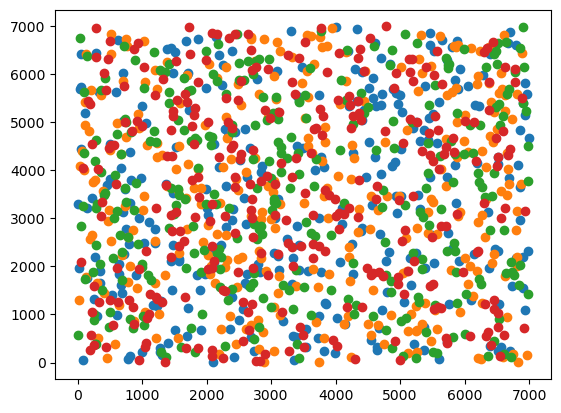

In [3]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0
while times < 4:
    # now lets create randomly N points in the space 0-300, 0-300
    n = 300
    random_p = torch.zeros(n, 2)
    x_lim = [min(data[:, 0]), max(data[:, 0])]
    y_lim = [min(data[:, 1]), max(data[:, 1])]


    for i in range(n):
        random_p[i] = torch.Tensor([np.random.randint(x_lim[0],x_lim[1]), np.random.randint(y_lim[0],y_lim[1])])
        
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        k_nearest_neighbors = ktree.root.query(query_point, k=1)

        for j, pred in enumerate(preds_per_layer):
            if any(np.array_equal(pred, k_nearest_neighbors[ki]) for ki in range(1)):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)

The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The percentage of correct predictions per layer is: 
[0. 0. 0. 0. 0. 0.]
The mean percentage of correct predictions is: 
[0. 0. 0. 0. 0. 0.]


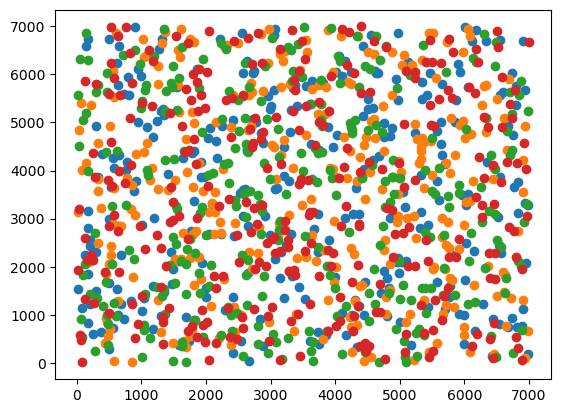

In [4]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0
while times < 4:
    # now lets create randomly N points in the space 0-300, 0-300
    n = 300
    random_p = torch.zeros(n, 2)
    x_lim = [min(data[:, 0]), max(data[:, 0])]
    y_lim = [min(data[:, 1]), max(data[:, 1])]


    for i in range(n):
        random_p[i] = torch.Tensor([np.random.randint(x_lim[0],x_lim[1]), np.random.randint(y_lim[0],y_lim[1])])
        
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        k_nearest_neighbors = ktree.root.query(query_point, k=2)

        for j, pred in enumerate(preds_per_layer):
            if any(np.array_equal(pred, k_nearest_neighbors[ki]) for ki in range(2)):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)

The percentage of correct predictions per layer is: 
[94.  84.8 64.  54.4 20.2  2.4]
The mean percentage of correct predictions is: 
[94.  84.8 64.  54.4 20.2  2.4]


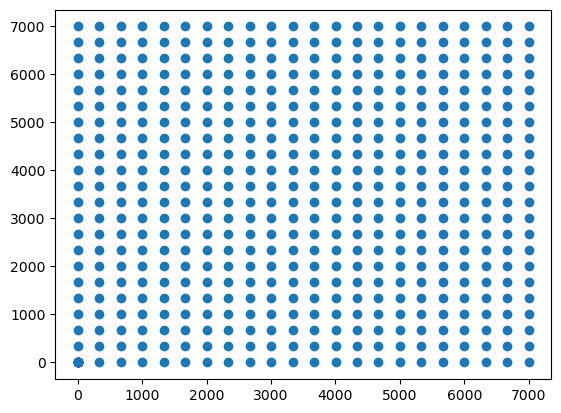

In [5]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0

while times < 1:
    nop =  500
    random_p = torch.zeros(nop, 2)
    x_lim = [min(data[:, 0]), max(data[:, 0])]
    y_lim = [min(data[:, 1]), max(data[:, 1])]
    num = int(np.sqrt(nop))
    for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
        for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
            random_p[i*num+j] = torch.Tensor([x, y])
    
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        brute_force = ktree.root.query(query_point)

        for j, pred in enumerate(preds_per_layer):
            if np.array_equal(pred, brute_force):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)